# **Project Name**    - Book Recommender System



##### **Project Type**    - Unsupervised Machine Learning
##### **Contribution**    - Individual
##### **Team Member 1 -**  Ananya Chatterjee


# **Project Summary -**

**Recommender systems** enhance our daily lives by personalizing content and product suggestions, saving time, and improving decision-making. They filter vast amounts of information by offering relevant recommendations based on individual preferences, thereby enhancing user experience across various platforms like e-commerce, streaming services, and social media. In this project, we have designed 2 types of recommender systems:

**(a) Popularity-based Recommender system**, which will give us top 50 books in terms of number of ratings (Note: We've considered only those books in which the number of ratings is greater than 250 votes).

**(b) Collaborative filtering based recommender system,** to predict similar books based on user ratings. Equal ratings of users will determine how similar will be the preferences of those users. The key idea is that if two users have similar preferences for some books, they are likely to have similar preferences for other books as well.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The primary objective of this project is: **"To build a book recommender system that effectively suggests books to users based on their individual preferences; moreover on the preferences of similar user personas."**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load Dataset
books=pd.read_csv('/content/drive/MyDrive/Book Recommender System/Books.csv')
ratings=pd.read_csv('/content/drive/MyDrive/Book Recommender System/Ratings.csv')
users=pd.read_csv('/content/drive/MyDrive/Book Recommender System/Users.csv')

<ipython-input-4-3350492d6b8b>:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books=pd.read_csv('/content/drive/MyDrive/Book Recommender System/Books.csv')


### Dataset First View

In [5]:
# Dataset First Look
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [6]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [7]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### Dataset Rows & Columns count

In [8]:
# Dataset Rows & Columns count
print(books.shape)
print(users.shape)
print(ratings.shape)

(271360, 8)
(278858, 3)
(1149780, 3)


### Dataset Information

In [9]:
# Dataset Info
print(books.info())
print(users.info())
print(ratings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), obje

#### Missing Values/Null Values

In [10]:
books.isnull().sum()

,0
ISBN,0
Book-Title,0
Book-Author,2
Year-Of-Publication,0
Publisher,2
Image-URL-S,0
Image-URL-M,0
Image-URL-L,3


<ipython-input-11-f74dd3326745>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')


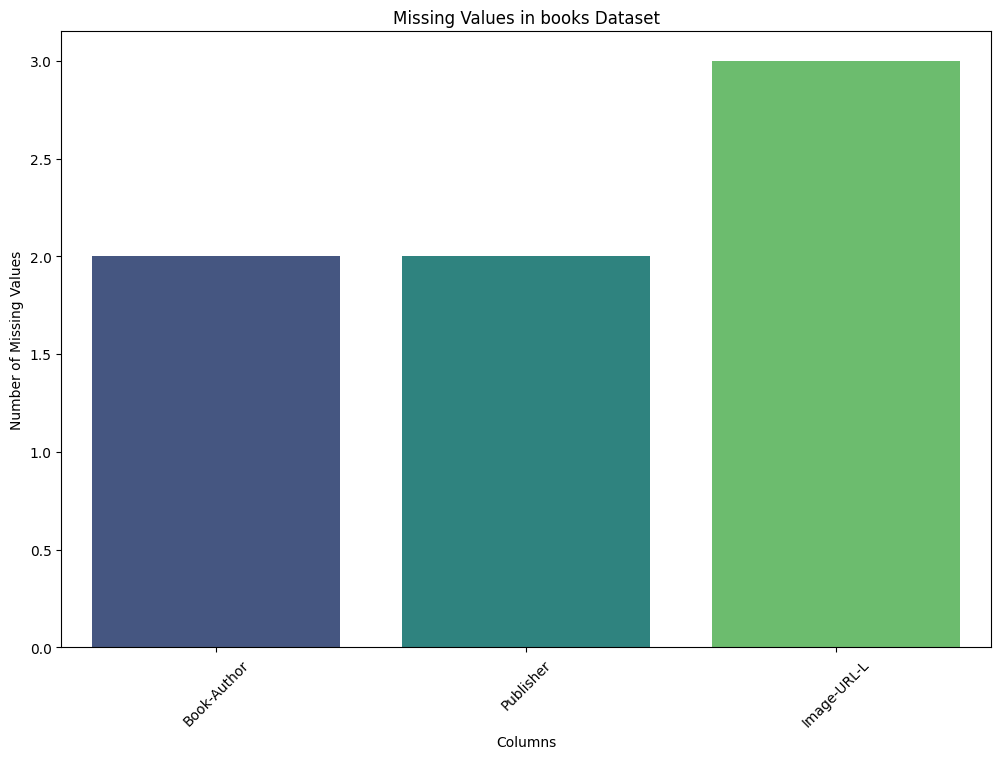

In [11]:
# Visualizing the missing values: "Books"

missing_values = books.isnull().sum()

# Filter out columns with no missing values
missing_values = missing_values[missing_values > 0]

# Set the plot size for better visibility
plt.figure(figsize=(12, 8))

# Create a barplot of missing values
sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add title and labels
plt.title('Missing Values in books Dataset')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')

# Show the plot
plt.show()

In [12]:
users.isnull().sum()

,0
User-ID,0
Location,0
Age,110762


<ipython-input-13-c04485cb1db7>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')


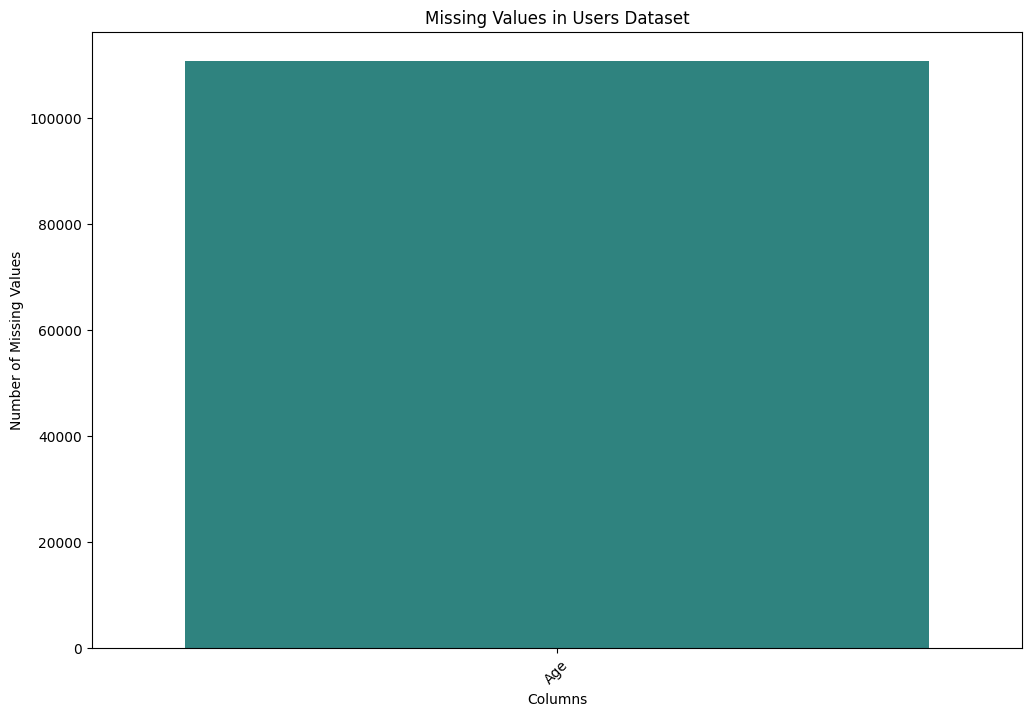

In [13]:
# Visualizing the missing values: "Users"

missing_values = users.isnull().sum()

# Filter out columns with no missing values
missing_values = missing_values[missing_values > 0]

# Set the plot size for better visibility
plt.figure(figsize=(12, 8))

# Create a barplot of missing values
sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add title and labels
plt.title('Missing Values in Users Dataset')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')

# Show the plot
plt.show()

In [14]:
ratings.isnull().sum()

,0
User-ID,0
ISBN,0
Book-Rating,0


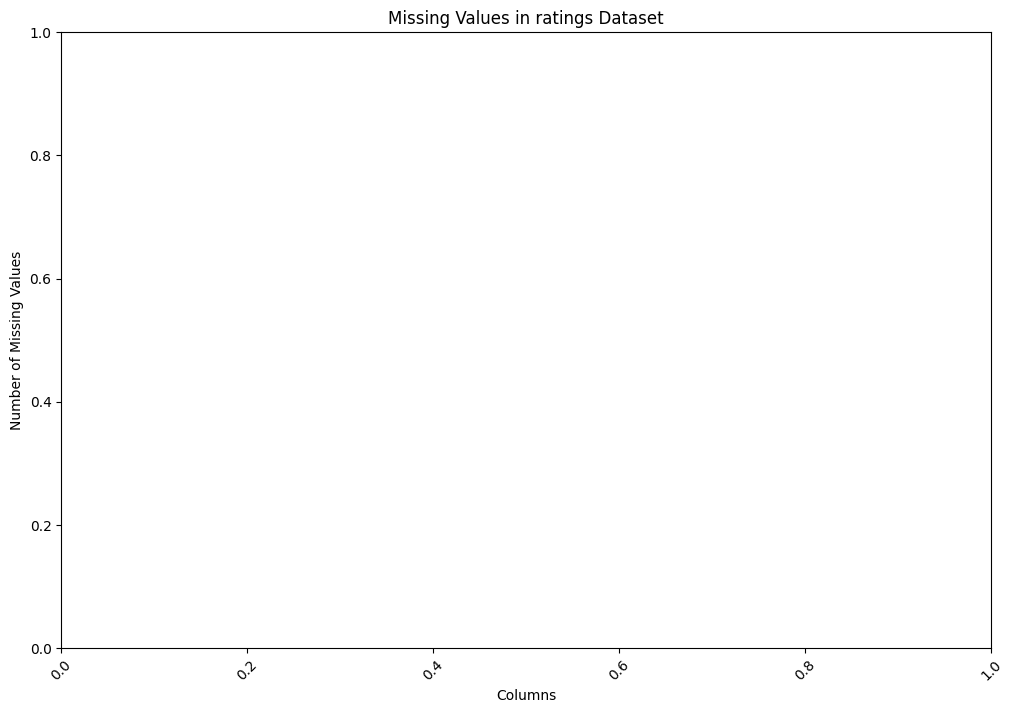

In [15]:
# Visualizing the missing values: "Ratings"

missing_values = ratings.isnull().sum()

# Filter out columns with no missing values
missing_values = missing_values[missing_values > 0]

# Set the plot size for better visibility
plt.figure(figsize=(12, 8))

# Create a barplot of missing values
sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add title and labels
plt.title('Missing Values in ratings Dataset')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')

# Show the plot
plt.show()

#### Duplicate Values

In [16]:
# Dataset Duplicate Value Count
print(books.duplicated().sum())
print(users.duplicated().sum())
print(ratings.duplicated().sum())

0
0
0


### What did you know about your dataset?

- There're 3 different datasets: **books, users, ratings**.
- **'Books'** has 271360 rows and 8 columns; entailing book related basic details (such as; title of the book, the author, ISBN of the book, publisher information and so on)
- **'Users'** has 278858 rows and 3 columns; entailing book user's personal information (user_id, location and Age)
- **'Ratings'** has 1149780 rows and 3 columns; entailing book ratings by the user.

## ***2. Understanding Your Variables***

In [17]:
# Dataset Columns
print(books.columns)
print(users.columns)
print(ratings.columns)

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')
Index(['User-ID', 'Location', 'Age'], dtype='object')
Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')


In [18]:
# Dataset Describe
books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271358,271360,271358,271360,271360,271357
unique,271360,242135,102022,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


In [19]:
users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [20]:
ratings.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


### Variables Description

Answer Here

### Check Unique Values for each variable.

In [21]:
# Check Unique Values for each variable.
print("Unique variables in books dataset:")
print(books.nunique())
print("Unique variables in users dataset:")
print(users.nunique())
print("Unique variables in ratings dataset:")
print(ratings.nunique())

Unique variables in books dataset:
ISBN                   271360
Book-Title             242135
Book-Author            102022
Year-Of-Publication       202
Publisher               16807
Image-URL-S            271044
Image-URL-M            271044
Image-URL-L            271041
dtype: int64
Unique variables in users dataset:
User-ID     278858
Location     57339
Age            165
dtype: int64
Unique variables in ratings dataset:
User-ID        105283
ISBN           340556
Book-Rating        11
dtype: int64


## 3. ***Data Wrangling***

### (a) Books

In [22]:
#Understanding the Books
print('Total number of books in the data:', books['Book-Title'].nunique())
print('Total number of Authors:', books['Book-Author'].nunique())
print('Total number of Publishers:', books['Publisher'].nunique())

Total number of books in the data: 242135
Total number of Authors: 102022
Total number of Publishers: 16807


### (b) Users

In [23]:
#Understanding the Users
print('Total number of unique users:',users['User-ID'].nunique())
print('Total number of locations:',users['Location'].nunique())
print('The median age of users:',users['Age'].median())

Total number of unique users: 278858
Total number of locations: 57339
The median age of users: 32.0


### (c) Ratings

In [24]:
#Understanding the Ratings
print('Total number of book ratings:',ratings['Book-Rating'].value_counts())

print('The median book ratings:',ratings['Book-Rating'].median())

Total number of book ratings: Book-Rating
0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: count, dtype: int64
The median book ratings: 0.0


In [25]:
# IQR Outlier Removal
q1 = users['Age'].quantile(0.25)
q3 = users['Age'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers_iqr = users[((users['Age'] < lower_bound) | (users['Age'] > upper_bound))]
#df_no_outliers_iqr = df1[((df1 >= lower_bound) & (df1 <= upper_bound)).all(axis=1)]

print("\nOutliers detected using IQR Outlier Removal:")
print(outliers_iqr)


Outliers detected using IQR Outlier Removal:
        User-ID                                      Location    Age
220         221                      palm beach, florida, usa   79.0
689         690                      lake oswego, oregon, usa   80.0
957         958                           lindale, texas, usa   78.0
1147       1148                  prairie village, kansas, usa   79.0
1288       1289                     san jose, california, usa  103.0
...         ...                                           ...    ...
278301   278302      düsseldorf, nordrhein-westfalen, germany  104.0
278317   278318                  studio city, california, usa   77.0
278348   278349                           carlin, nevada, usa   76.0
278412   278413                    kansas city, missouri, usa   76.0
278471   278472  biel-benken bl/schweiz, alabama, switzerland   81.0

[1084 rows x 3 columns]


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Feature Engineering & Data Pre-processing***

## **1. Handling Missing Values**

## (a) Books

In [26]:
# Handling Missing Values & Missing Value Imputation
# find the null value in books dataset
books.isnull().sum()

,0
ISBN,0
Book-Title,0
Book-Author,2
Year-Of-Publication,0
Publisher,2
Image-URL-S,0
Image-URL-M,0
Image-URL-L,3


In [27]:
#dropping null values
books.dropna(inplace=True)

In [28]:
# understanding 'Year-Of-Publication'
books['Year-Of-Publication'].value_counts().index.values

array([2002, 2001, 1999, 2000, 1998, 2003, 1997, 1996, 1995, 1994, 1993,
       1992, 1991, 1990, 1989, 1988, 1987, 2004, 1986, '1999', 1985,
       '2000', '2002', '1998', '2001', 1984, 0, '1997', '1996', 1983,
       '1995', 1982, '1994', '2003', '1993', '1992', '1991', 1981, '1990',
       '1989', '1988', 1980, '1987', '1986', 1979, 1978, '1985', 1977,
       '1984', '2004', '1983', 1976, '1982', '0', '1981', 1975, '1980',
       1974, '1979', 1973, '1978', 1972, '1977', '1976', '1975', 1971,
       '1974', 1970, '1973', 1969, '1972', '1971', 1968, '1970', 1966,
       1967, 1965, 1964, '1969', 1963, 1960, 1961, 1962, 1959, '1968',
       1958, 1957, '1965', 1953, 1955, '1960', 1956, '1961', 1954, '1966',
       '1962', '1967', '1963', '1964', 1951, 2005, 1940, '1959', '1956',
       1920, '1957', '1955', 1952, 1950, '1958', '2005', '1953', 1942,
       1930, 1946, '1952', 1947, 1911, '1911', '1951', '1950', 1949, 1941,
       '1940', '1954', 1923, 1939, 1901, 1929, 1938, 1948, 1943

In [29]:
# Step 1: Filter out invalid or non-year values
valid_years = books['Year-Of-Publication'].astype(str).str.isnumeric()
books = books[valid_years]

# Step 2: Convert the column data to integers
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(int)

# Step 3: Create a new datetime column from the integers representing years
books['Publication_Date'] = pd.to_datetime(books['Year-Of-Publication'], format='%Y', errors='coerce')

# Drop the old 'Year-Of-Publication' column if you don't need it anymore
books.drop(columns=['Year-Of-Publication'], inplace=True)

# Display the DataFrame to check the new datetime column
books = pd.DataFrame(books)

In [30]:
# Step 4: Create a new column with only the year part as integers
books['Year-Of-Publication'] = books['Publication_Date'].dt.year

In [31]:
books['Year-Of-Publication'].value_counts().index.values

array([2002., 1999., 2001., 2000., 1998., 1997., 2003., 1996., 1995.,
       1994., 1993., 1992., 1991., 1990., 1989., 1988., 1987., 1986.,
       2004., 1985., 1984., 1983., 1982., 1981., 1980., 1979., 1978.,
       1977., 1976., 1975., 1974., 1973., 1972., 1971., 1970., 1969.,
       1968., 1966., 1967., 1965., 1964., 1960., 1961., 1963., 1962.,
       1959., 1958., 1957., 1956., 1955., 1953., 1954., 2005., 1951.,
       1940., 1952., 1920., 1950., 1911., 1942., 1947., 1946., 1930.,
       1949., 1923., 1941., 1939., 1948., 1945., 1943., 1901., 1938.,
       2030., 1936., 1929., 1937., 1932., 1944., 1933., 1935., 2006.,
       1900., 1931., 2020., 1927., 1921., 1922., 1909., 2011., 1925.,
       1926., 2010., 1924., 1902., 2050., 1928., 1904., 2012., 2024.,
       1897., 1919., 2008., 1934., 1910., 1806., 2021., 2038., 1906.,
       1908., 1914., 1917., 2026., 2037.])

In [32]:
# invalid data

books = books[~(books['Year-Of-Publication'] == 2037)]
books = books[~(books['Year-Of-Publication'] == 2026)]
books = books[~(books['Year-Of-Publication'] == 2030)]
books = books[~(books['Year-Of-Publication'] == 2050)]
books = books[~(books['Year-Of-Publication'] == 2038)]

## (b) Users

In [33]:
# total null values in users data
print(users.isnull().sum())
# percentage of null values in each column
print(round(100*(users.isnull().sum()/len(users.index)),2))

User-ID          0
Location         0
Age         110762
dtype: int64
User-ID      0.00
Location     0.00
Age         39.72
dtype: float64


In [34]:
#since there're a lot of null values in the 'Age' column, we're going to drop it
users.drop('Age',axis=1,inplace=True)

In [35]:
#Extracting user's country from 'Location'
users['Location'] = users['Location'].apply(lambda x:x.split(',')[-1])

In [36]:
# Top 10 user location
users['Location'].value_counts().head(10)

,count
Location,
usa,139711
canada,21658
united kingdom,18538
germany,17043
spain,13147
australia,11784
italy,11266
,4578
france,3455


## (c) Ratings

In [37]:
# find the null value in ratings dataset
ratings.isnull().sum()

,0
User-ID,0
ISBN,0
Book-Rating,0


#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

## ***5. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart 1- Highest number of book releasing year

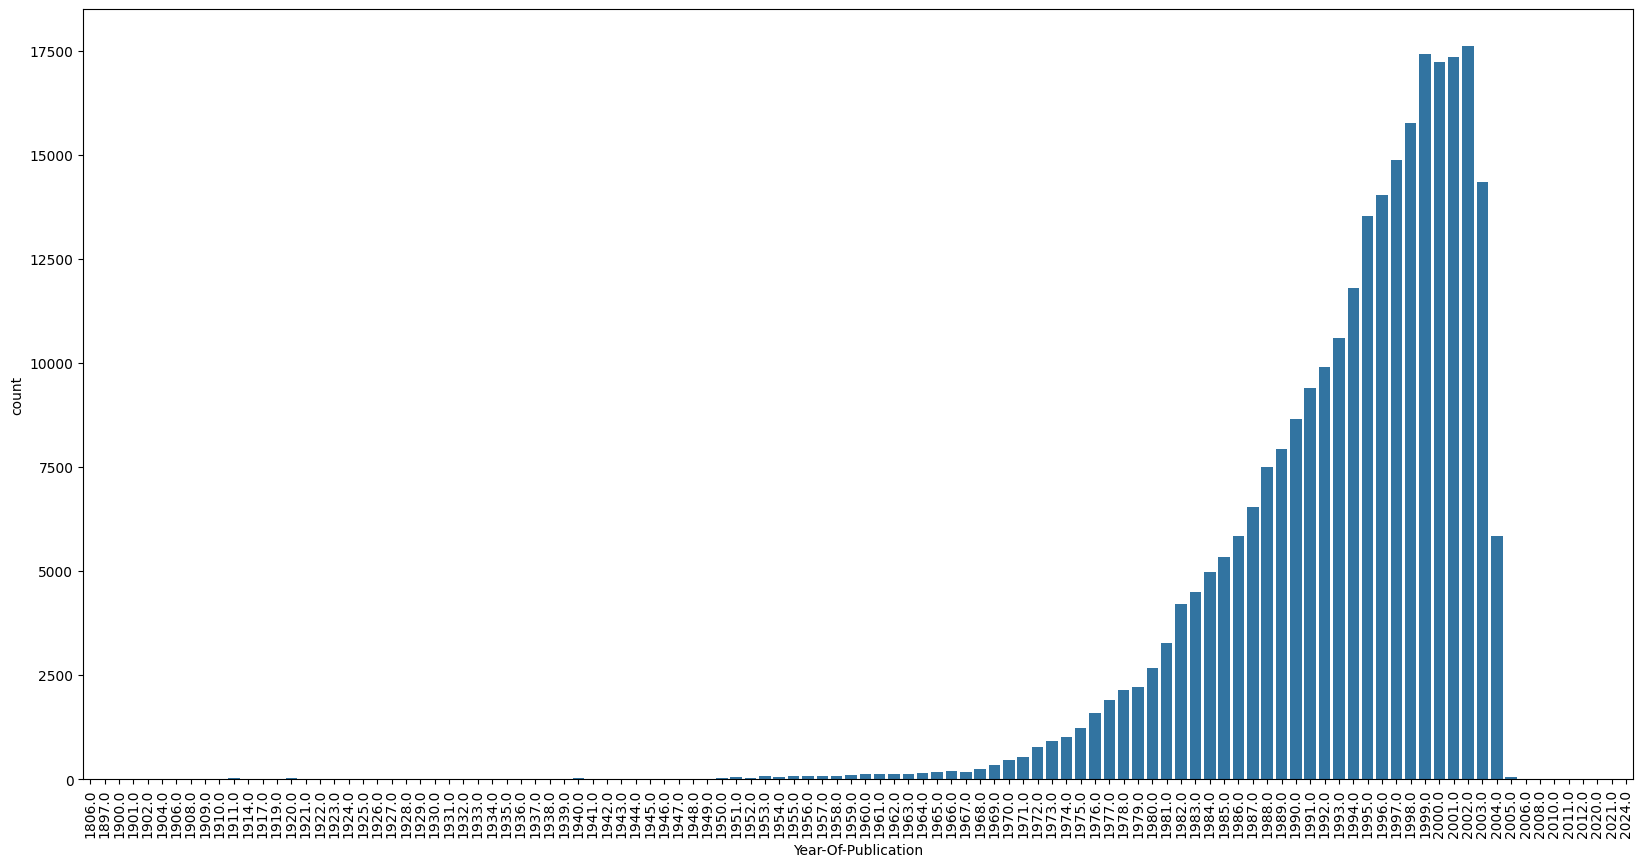

In [38]:
# Chart - Number of books published per year

plt.figure(figsize=(20,10))
sns.countplot(x=books['Year-Of-Publication']);
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

In this visualization, we want to depict number of books released per year. Since, 'year' is a category and we want to compare the count of books for each sub-category (i.e., year); we've chosen a bar chart.

##### 2. What is/are the insight(s) found from the chart?

Out of 242135 books; almost 44% (105525 books) were released within a span of 9 years i.e., 1994 to 2003.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart 3 - Topmost Publishers

<Axes: xlabel='Publisher'>

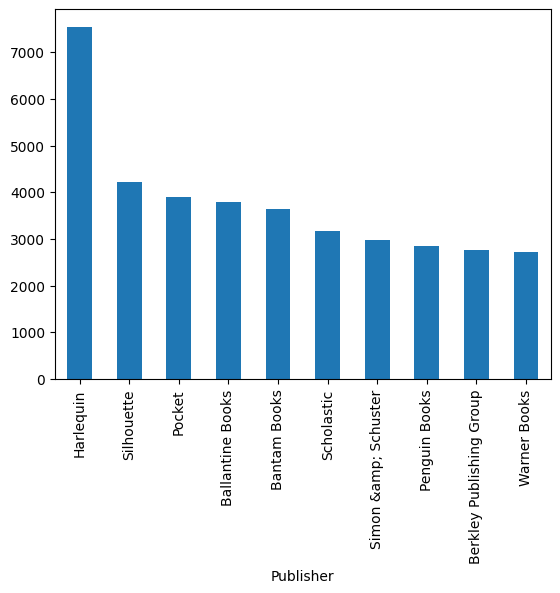

In [39]:
# top 10 Publisher
books['Publisher'].value_counts().head(10).plot(kind='bar')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart 4 - Ratings distribution

<Axes: xlabel='Book-Rating'>

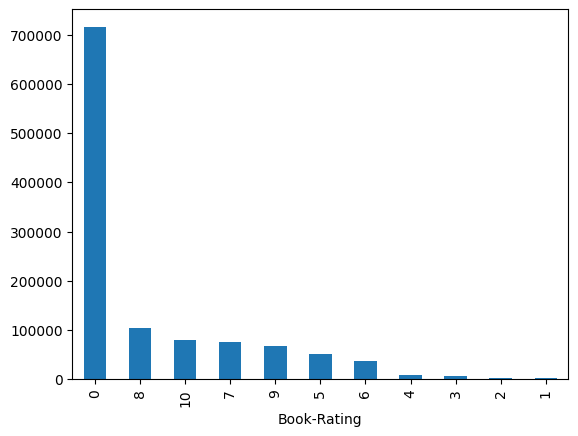

In [40]:
# Chart - 3 visualization code
ratings['Book-Rating'].value_counts().plot(kind='bar')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart 5 - Top 10 user's Location

<Axes: xlabel='Location'>

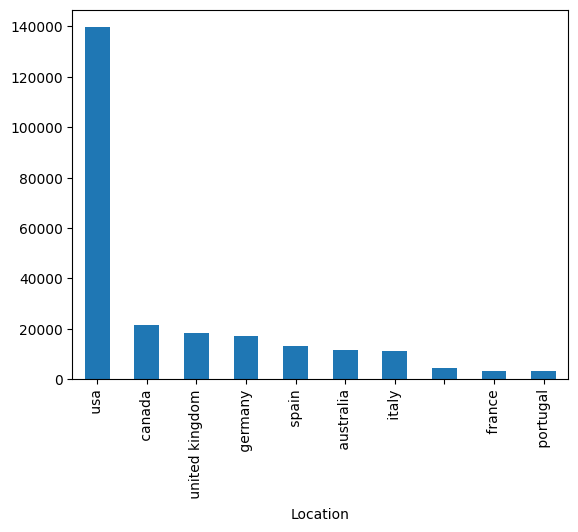

In [41]:
# Chart - 5
# top 10 user location
users['Location'].value_counts().head(10).plot(kind='bar')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

In [42]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

In [43]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

In [44]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

In [45]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

In [46]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

In [47]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

In [48]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

In [49]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

In [50]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***7. ML Model Implementation: BOOK RECOMMENDER SYSTEM***

### Popularity Based Book Recommender
-- Top 50 books with highest average ratings, for only those books where the minimum votes >= 250

In [51]:
#Merging 'ratings' and 'books' dataframes into one
ratings_with_books=ratings.merge(books, on='ISBN')


In [52]:
#Grouping books based on no. of votes
num_ratings=ratings_with_books.groupby('Book-Title').count()['Book-Rating'].reset_index()


In [53]:
#Rename columns
num_ratings.rename(columns={'Book-rating':'Total_rating'},inplace=True)


In [54]:
#creating a new dataframe with 'book title' and 'average ratings'
avg_ratings=ratings_with_books.groupby('Book-Title')['Book-Rating'].mean().reset_index()
#Rename columns
avg_ratings.rename(columns={'Book-rating':'Average_rating'})
avg_ratings


,Book-Title,Book-Rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241049,Ã?Â?lpiraten.,0.000000
241050,Ã?Â?rger mit Produkt X. Roman.,5.250000
241051,Ã?Â?sterlich leben.,7.000000
241052,Ã?Â?stlich der Berge.,2.666667


In [55]:
popularity_df=num_ratings.merge(avg_ratings,on='Book-Title')
popularity_df.rename(columns={'Book-Rating_x':'Total_ratings', 'Book-Rating_y':'Avg_ratings'}, inplace=True)

In [56]:
popularity_df

,Book-Title,Total_ratings,Avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241049,Ã?Â?lpiraten.,2,0.000000
241050,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241051,Ã?Â?sterlich leben.,1,7.000000
241052,Ã?Â?stlich der Berge.,3,2.666667


In [57]:
#filter out those books where total ratings are less than 250
popularity_df=popularity_df[popularity_df['Total_ratings']>=250].sort_values('Avg_ratings', ascending=False).head(50)


In [58]:
popularity_df=popularity_df.merge(books, on='Book-Title').drop_duplicates('Book-Title')[['Book-Title', 'Book-Author', 'Image-URL-M', 'Total_ratings', 'Avg_ratings']]

In [59]:
popularity_df

,Book-Title,Book-Author,Image-URL-M,Total_ratings,Avg_ratings
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,556,5.183453
16,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339681.0...,281,5.007117
17,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.0...,368,4.948370
26,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,575,4.895652
28,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339711.0...,260,4.880769
39,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.0...,510,4.700000


## Collaborative Filtering based Recommender System

In [60]:
#Filtering out those users who has rated less than 200 books
x=ratings_with_books.groupby('User-ID').count()['Book-Rating'] > 200
#There're 811 users who have rated >=200 books
learned_users=x[x].index

In [61]:
#Keeping only those ratings where 'learned_users' have voted
filtered_rating=ratings_with_books[ratings_with_books['User-ID'].isin(learned_users)]

In [62]:
#filtering out those books where the no. of ratings is less than 50
y=filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50
#There're 706 books that has received >= 50 ratings
famous_books=y[y].index

In [63]:
#keeping only ratings of famous books
final_ratings=filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

In [64]:
#creating a pivot table with rows as the book titles of famous books (706) & columns are 810 learned users
pt=final_ratings.pivot_table(index='Book-Title', columns='User-ID', values='Book-Rating')

In [65]:
#filling in NAN values with 0
pt.fillna(0, inplace=True)

In [66]:
#Lets understand the similarity between books, by calculating distances amongst them
from sklearn.metrics.pairwise import cosine_similarity
similarity_scores=cosine_similarity(pt)

In [67]:
similarity_scores

array([[1.        , 0.10255025, 0.01220856, ..., 0.12110367, 0.07347567,
        0.04316046],
       [0.10255025, 1.        , 0.2364573 , ..., 0.07446129, 0.16773875,
        0.14263397],
       [0.01220856, 0.2364573 , 1.        , ..., 0.04558758, 0.04938579,
        0.10796119],
       ...,
       [0.12110367, 0.07446129, 0.04558758, ..., 1.        , 0.07085128,
        0.0196177 ],
       [0.07347567, 0.16773875, 0.04938579, ..., 0.07085128, 1.        ,
        0.10602962],
       [0.04316046, 0.14263397, 0.10796119, ..., 0.0196177 , 0.10602962,
        1.        ]])

In [68]:
#Creating a recommender, using a custom function
def recommend(book_name):
  #fetching the index nos. of the books
  index=np.where(pt.index==book_name)[0][0]
  similar_books=sorted(list(enumerate(similarity_scores[index])), key=lambda x:x[1], reverse=True)[1:7]

  for i in similar_books:
    print(pt.index[i[0]])

In [69]:
#Testing out the recommender
recommend('1984')

Animal Farm
The Handmaid's Tale
Brave New World
The Vampire Lestat (Vampire Chronicles, Book II)
The Hours : A Novel
Fahrenheit 451


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [70]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [71]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [72]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [73]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [74]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [75]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [76]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [77]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [78]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***